# Lógica e Programação - Aula 09
## Graduação Online - PUCRS/UOL EdTech

### Marcelo Cohen (marcelo.cohen@pucrs.br)
### Sílvia Maria Wanderley Moraes (silvia.moraes@pucrs.br)


## 1. Trabalhando com Gráficos

In [ ]:
# Exemplo 1: plotando dados

import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[2,4,9,16])
plt.show()

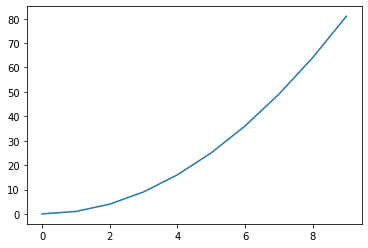

In [ ]:
# Exemplo 2: preenchendo uma lista e plotando

import matplotlib.pyplot as plt
listax = []
listay = []

listax = [x for x in range(10)]
listay = [x**2 for x in range(10)]
#for x in range(10):
#  listax.append(x)
#  listay.append(x**2)
plt.plot(listax,listay)
plt.show()

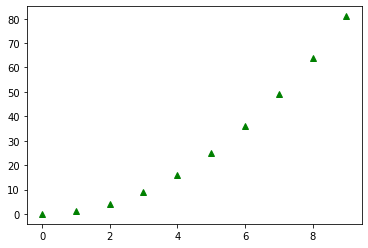

In [ ]:
# Exemplo 3: variando o estilo do traçado

import matplotlib.pyplot as plt

listax = [x for x in range(10)]
listay = [x**2 for x in range(10)]

plt.plot(listax,listay,'ro')
plt.show()

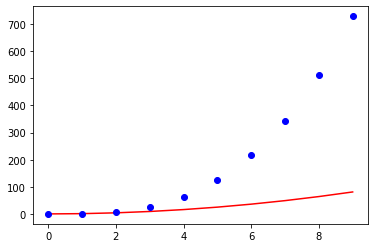

In [ ]:
# Exemplo 4: desenhando mais de uma curva

import matplotlib.pyplot as plt

listax = [x for x in range(10)]
listay = [x**2 for x in range(10)]
listay2 = [x**3 for x in range(10)]

plt.plot(listax,listay,'r-')
plt.plot(listax,listay2,'bo')
plt.show()

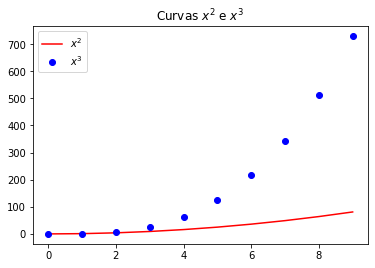

In [ ]:
# Exemplo 5: adicionando rótulos e um título ao gráfico

import matplotlib.pyplot as plt

listax = [x for x in range(10)]
listay = [x**2 for x in range(10)]
listay2 = [x**3 for x in range(10)]

plt.plot(listax,listay,'r-',label="$x^2$")
plt.plot(listax,listay2,'bo', label="$x^3$")

plt.title("Curvas $x^2$ e $x^3$")
plt.legend()

plt.show()

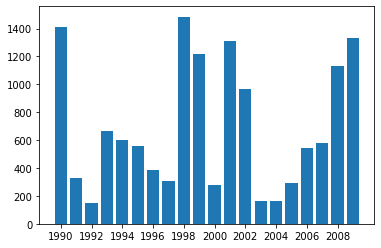

In [ ]:
# Exemplo 6: gráfico de barras

import matplotlib.pyplot as plt
import random

random.seed(42)
anos = [a for a in range(1990,2010)]
valores = [random.randint(100,1500) for v in range(len(anos))]

plt.bar(anos,valores)
plt.xticks(range(1990,2010,2))
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


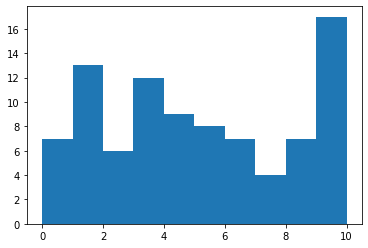

In [ ]:
# Exemplo 7: histograma

import matplotlib.pyplot as plt
import random

random.seed(42)

valores = [random.randint(0,11) for v in range(0,100)]
#print(valores)
x = [v+0.5 for v in range(0,11)]
#print(x)
plt.hist(valores,x)
plt.show()

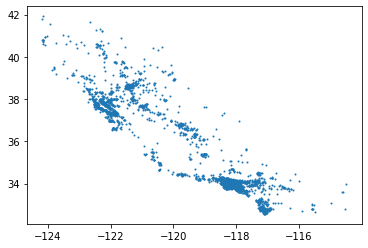

In [ ]:
# Exemplo 8: plotando dados a partir de um arquivo

import matplotlib.pyplot as plt

def carregaDados(nomeArq):
  aux = []
  with open(nomeArq) as csv:
    csv.readline()
    for linha in csv:
      nova = [float(val) for val in linha.split(',')]
      aux.append(nova)
  return aux

dados = carregaDados("sample_data/california_housing_test.csv")

longitudes = [aux[0] for aux in dados]
latitudes = [aux[1] for aux in dados]

#plt.plot(longitudes,latitudes,'bo')
plt.scatter(longitudes,latitudes,s=1)
plt.show()

In [ ]:
# Exemplo 9: plotando um mapa + informações do arquivo

import folium

map = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5)#, tiles="Stamen Terrain") 

for aux in dados:
  folium.CircleMarker(radius=1,location=[aux[1],aux[0]]).add_to(map)

map

## 2. Problemas com gráficos

In [ ]:
# Exemplo 10: utilizando o recurso de agrupamento (clustering)

import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5)

marker_cluster = MarkerCluster().add_to(map)

for aux in dados:
  folium.CircleMarker(radius=5,location=[aux[1],aux[0]]).add_to(marker_cluster)

map

In [ ]:
# Exemplo 11: utilizando o recurso de mapa de calor (heatmap)

import folium
from folium.plugins import HeatMap

map = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5)

print(dados[0:7][2:4])
aux2 = [[aux[1],aux[0],aux[7]] for aux in dados]

HeatMap(aux2,min_opacity=0.1).add_to(map)

map

[[-117.81, 33.78, 27.0, 3589.0, 507.0, 1484.0, 495.0, 5.7934, 270500.0], [-118.36, 33.82, 28.0, 67.0, 15.0, 49.0, 11.0, 6.1359, 330000.0]]


Ângulo:45
Vel. inicial (m/s):10
Altura inicial:0
0.000 0.000
0.300 0.291
0.600 0.565
0.900 0.821
1.200 1.059
1.500 1.279
1.800 1.482
2.100 1.667
2.400 1.835
2.700 1.985
3.000 2.117
3.300 2.232
3.600 2.329
3.900 2.408
4.200 2.470
4.500 2.513
4.800 2.540
5.100 2.548
5.400 2.539
5.700 2.513
6.000 2.468
6.300 2.406
6.600 2.327
6.900 2.229
7.200 2.114
7.500 1.982
7.800 1.832
8.100 1.664
8.400 1.478
8.700 1.275
9.000 1.054
9.300 0.815
9.600 0.559
9.900 0.285


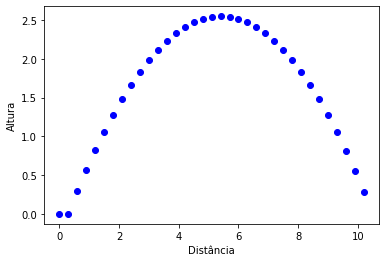

In [ ]:
# Exemplo 12: lançamento de projétil

import math
import matplotlib.pyplot as plt

g = 9.81
ang = float(input("Ângulo:"))
v0 = float(input("Vel. inicial (m/s):"))
y0 = float(input("Altura inicial:"))

listax = []
listay = []

# Converte ângulo para radianos
ang = math.radians(ang)

y = 0
x = 0

while y >= 0:
  listax.append(x)
  listay.append(y)
  y = x * math.tan(ang) - (1/(2*v0*v0) * g*x*x/math.cos(ang)**2) + y0
  #if y >= 0:
  #  print(f"{x:.3f} {y:.3f}")
  x = x + 0.3

plt.xlabel("Distância")
plt.ylabel("Altura")
plt.plot(listax,listay,'bo')

In [ ]:
# Exemplo 13: Fibonacci e sementes de girassol

def fibo(n):
  n1 = 1
  n2 = 1
  print(f"{n1:3}")
  for cont in range(n):
    print(f"{n2:3}: ",end="")
    n1,n2 = n2, n1+n2
    print(f"{n1/n2}")
  print()

fibo(15)

  1
  1: 0.5
  2: 0.6666666666666666
  3: 0.6
  5: 0.625
  8: 0.6153846153846154
 13: 0.6190476190476191
 21: 0.6176470588235294
 34: 0.6181818181818182
 55: 0.6179775280898876
 89: 0.6180555555555556
144: 0.6180257510729614
233: 0.6180371352785146
377: 0.6180327868852459
610: 0.6180344478216818
987: 0.6180338134001252



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.618033988749895
137.50776405003785


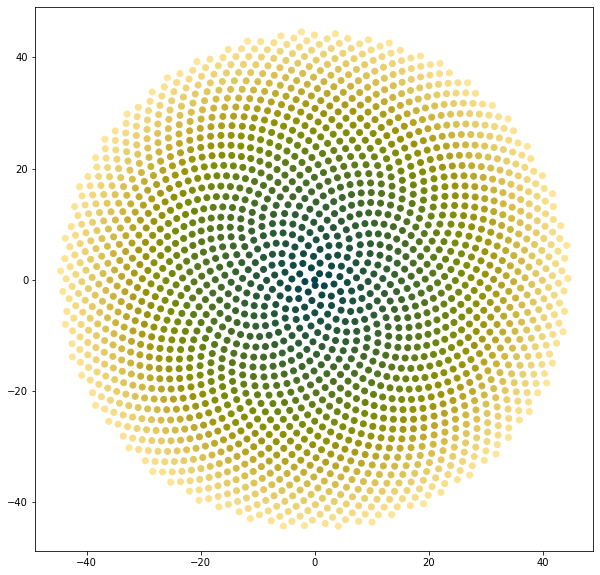

In [ ]:
# Exemplo 13 (cont.): Fibonacci e sementes de girassol

!pip install cmcrameri

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import math

listax = []
listay = []
dists = []

phi = (1 + math.sqrt(5))/2
angAureo = 360 - 360/phi

print(phi)
print(angAureo)

ang = 0

for cont in range(2000):
  dist = math.sqrt(cont)
  ang = ang + angAureo
  ang_rad = math.radians(ang)
  x = dist * math.cos(ang_rad)
  y = dist * math.sin(ang_rad)
  listax.append(x)
  listay.append(y)
  dists.append(dist)

# plt.plot(listax,listay,'yo')

plt.figure(figsize=(10,10))

# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.scatter(listax,listay,c=dists,cmap=cmc.bamako)

## 3. Dicionários e Conjuntos

In [ ]:
# Exemplo 14: dicionário

dic = {}

dic["Fulano"] = "99817-9123"
dic["Beltrano"] = "99671-7562"
dic["Ciclano"] = "99881-1642"

nome = ""
while nome != "fim":
  nome = input("Nome a procurar (fim para encerrar): ")
  if nome != "fim":
    if nome in dic:
      print(f"Telefone: {dic[nome]}")
    else:
      print("Nome não encontrado!")

Nome a procurar (fim para encerrar): Fulano
Telefone: 99817-9123
Nome a procurar (fim para encerrar): Marcelo
Nome não encontrado!
Nome a procurar (fim para encerrar): Ciclano
Telefone: 99881-1642
Nome a procurar (fim para encerrar): fim


In [ ]:
# Exemplo 15: removendo chaves e valores

dic = {}

dic["Fulano"]   = "99817-9123"
dic["Beltrano"] = "99671-7562"
dic["Ciclano"]  = "99881-1642"

nome = ""
while nome != "fim":
  print()
  print(f"Tamanho do dicionário: {len(dic)}")
  print(dic)
  print()
  nome = input("Nome a remover (fim para encerrar): ")
  if nome != "fim":
    if nome in dic:
      del dic[nome]
      print("Nome removido!")
    else:
      print("Nome não encontrado!")


Tamanho do dicionário: 3
{'Fulano': '99817-9123', 'Beltrano': '99671-7562', 'Ciclano': '99881-1642'}

Nome a remover (fim para encerrar): Marcelo
Nome não encontrado!

Tamanho do dicionário: 3
{'Fulano': '99817-9123', 'Beltrano': '99671-7562', 'Ciclano': '99881-1642'}

Nome a remover (fim para encerrar): Beltrano
Nome removido!

Tamanho do dicionário: 2
{'Fulano': '99817-9123', 'Ciclano': '99881-1642'}

Nome a remover (fim para encerrar): Fulano
Nome removido!

Tamanho do dicionário: 1
{'Ciclano': '99881-1642'}

Nome a remover (fim para encerrar): Ciclano
Nome removido!

Tamanho do dicionário: 0
{}

Nome a remover (fim para encerrar): fim


In [ ]:
# Exemplo 16: outras operações de consulta

dic = {}

dic["Fulano"]   = "99817-9123"
dic["Beltrano"] = "99671-7562"
dic["Ciclano"]  = "99881-1642"

print(dic.keys())
print(dic.values())
print(dic.items())
print()
print(f"Telefone de Fulano: {dic.get('Fulano')}")
print(f"Telefone de Veltrano: {dic.get('Veltrano')}")

dict_keys(['Fulano', 'Beltrano', 'Ciclano'])
dict_values(['99817-9123', '99671-7562', '99881-1642'])
dict_items([('Fulano', '99817-9123'), ('Beltrano', '99671-7562'), ('Ciclano', '99881-1642')])

Telefone de Fulano: 99817-9123
Telefone de Veltrano: None


In [ ]:
# Exemplo 17: percorrendo dicionários
# Usando keys(), values(), items(), sorted(...)

dic = {}

dic["Fulano"]   = "99817-9123"
dic["Beltrano"] = "99671-7562"
dic["Ciclano"]  = "99881-1642"
dic["Pedro"]    = "99123-2432"

for k in dic.keys():
  print(f"Chave: {k}")

print()

for v in dic.values():
  print(f"Valor: {v}")

print()
print("Chaves e valores em ordem de inclusão:")
for k,v in dic.items():
  print(f"{k:8} -> {v}")

print()
print("Ordenado pelas chaves:")
for k,v in sorted(dic.items()):
  print(f"{k:8} -> {v}")

print()
print("Ordenado pelos valores:")
for k,v in sorted(dic.items(), key=lambda x: x[1]):
  print(f"{k:8} -> {v}")

Chave: Fulano
Chave: Beltrano
Chave: Ciclano
Chave: Pedro

Valor: 99817-9123
Valor: 99671-7562
Valor: 99881-1642
Valor: 99123-2432

Chaves e valores em ordem de inclusão:
Fulano   -> 99817-9123
Beltrano -> 99671-7562
Ciclano  -> 99881-1642
Pedro    -> 99123-2432

Ordenado pelas chaves:
Beltrano -> 99671-7562
Ciclano  -> 99881-1642
Fulano   -> 99817-9123
Pedro    -> 99123-2432

Ordenado pelos valores:
Pedro    -> 99123-2432
Beltrano -> 99671-7562
Fulano   -> 99817-9123
Ciclano  -> 99881-1642


In [ ]:
# Exemplo 18: operações sobre conjuntos

a = set()

op = ""
while op != "fim":
  print()
  print(f"Conjunto: {a}")
  print()
  print("Digite um valor a inserir no conjunto")
  op = input("pop para remover um elemento, fim para encerrar: ")
  if op == "pop":
    if len(a) < 0:
      print("Conjunto está vazio!")
    else:
      v = a.pop()
      print(f"Valor removido: {v}")
  else:
    a.add(op)


Conjunto: set()

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: 1

Conjunto: {'1'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: 2

Conjunto: {'2', '1'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: 4

Conjunto: {'4', '2', '1'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: 8

Conjunto: {'8', '4', '2', '1'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: 12

Conjunto: {'8', '12', '1', '4', '2'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: 7

Conjunto: {'7', '8', '12', '1', '4', '2'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: pop
Valor removido: 7

Conjunto: {'8', '12', '1', '4', '2'}

Digite um valor a inserir no conjunto
pop para remover um elemento, fim para encerrar: pop
Valor removido: 8

Conj

In [ ]:
# Exemplo 19: operações sobre conjuntos (2)

a = set([1,2,3,4,5,6])
b = set([4,5,6,7,8,9])
c = set([1,3,5])

print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")

print()
print(f"união     a+b: {a.union(b)}")
print(f"diferença a-b: {a.difference(b)}")
print(f"diferença b-a: {b.difference(a)}")
print(f"intersec. a&b: {a.intersection(b)}")
print(f"dif. sim. a^b: {a.symmetric_difference(b)}")

print(f"a contém  c  : {a.issuperset(c)}")
print(f"c contido a  : {c.issubset(a)}")

a: {1, 2, 3, 4, 5, 6}
b: {4, 5, 6, 7, 8, 9}
c: {1, 3, 5}

união     a+b: {1, 2, 3, 4, 5, 6, 7, 8, 9}
diferença a-b: {1, 2, 3}
diferença b-a: {8, 9, 7}
intersec. a&b: {4, 5, 6}
dif. sim. a^b: {1, 2, 3, 7, 8, 9}
a contém  c  : True
c contido a  : True


## 4. Problemas com dicionários e conjuntos

In [ ]:
# Exemplo 20: contar frequência de letras em um texto

import string

# Cria dicionario vazio
freq = {}

# Le o texto e passa para minusculas
texto = input("Texto:")
texto = texto.lower()

# Para cada letra no texto:
for letra in texto:
    # Se ja esta no dicionario...
    if letra == " ": continue
    if letra not in freq:
        freq[letra] = 0
    # Incrementa a frequencia da letra (valor)
    freq[letra] = freq[letra] + 1

# Para cada chave...
for chave in sorted(freq.keys()):
   # Mostra a letra e a sua frequencia
   print(chave," => ",freq[chave])

# Usa conjuntos para descobrir as letras
# usadas e não usadas no texto
todasLetras = set(string.ascii_lowercase)
usadas = set(freq.keys())
naoUsadas = todasLetras - usadas

print(f"Letras usadas    : {sorted(usadas)}")
print(f"Letras não usadas: {sorted(naoUsadas)}")

Texto:exemplo de texto para testar a contagem de frequência das letras
a  =>  8
c  =>  2
d  =>  3
e  =>  9
f  =>  1
g  =>  1
i  =>  1
l  =>  2
m  =>  2
n  =>  2
o  =>  3
p  =>  2
q  =>  1
r  =>  4
s  =>  3
t  =>  6
u  =>  1
x  =>  2
ê  =>  1
Letras usadas    : ['a', 'c', 'd', 'e', 'f', 'g', 'i', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'x', 'ê']
Letras não usadas: ['b', 'h', 'j', 'k', 'v', 'w', 'y', 'z']


In [ ]:
# Exemplo 21: contar frequência de palavras em um arquivo

!curl  https://www.gutenberg.org/cache/epub/55752/pg55752.txt -o domcasmurro.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  408k  100  408k    0     0   207k      0  0:00:01  0:00:01 --:--:--  207k


In [ ]:
# Exemplo 21 (cont.): contar frequência de palavras em um arquivo
import string
import nltk

# https://www.gutenberg.org/ebooks/55752

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords[:10])

# Cria dicionario vazio
freq = {}

with open("domcasmurro.txt") as arq:
  inicio = False
  # Para cada linha no texto:
  for linha in arq:
    linha = linha[:-1]
    if linha == 'I':
      inicio = True
    if not inicio or linha == "": continue
    linha = linha.lower()
    for pont in string.punctuation:
      linha = linha.replace(pont,"")
    for pal in linha.split(" "):
      if len(pal)<3 or pal in stopwords:
        continue
      if pal not in freq:
        freq[pal] = 0
      freq[pal] = freq[pal] + 1

cont = 1
# Primeiras 30 palavras, em ordem decrescente de frequência
for chave,valor in sorted(freq.items(), key=lambda x: x[1], reverse=True):
   # Mostra a palavra e a sua frequencia
   print(f"{cont:3} - [{chave}] => {valor}")
   cont += 1
   if cont > 30:
     break

print()
print(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']
  1 - [capitú] => 343
  2 - [elle] => 238
  3 - [mãe] => 227
  4 - [dias] => 191
  5 - [tambem] => 189
  6 - [tudo] => 187
  7 - [ella] => 184
  8 - [the] => 178
  9 - [casa] => 169
 10 - [olhos] => 165
 11 - [mim] => 162
 12 - [josé] => 159
 13 - [assim] => 158
 14 - [vez] => 148
 15 - [agora] => 145
 16 - [ainda] => 140
 17 - [outra] => 139
 18 - [nada] => 132
 19 - [tão] => 121
 20 - [tempo] => 121
 21 - [disse] => 119
 22 - [dia] => 111
 23 - [padre] => 111
 24 - [escobar] => 111
 25 - [outro] => 106
 26 - [então] => 101
 27 - [cousa] => 96
 28 - [bem] => 91
 29 - [aqui] => 87
 30 - [dizer] => 87

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Exemplo 22: acessando dados de arquivo

!curl https://raw.githubusercontent.com/mflash/logicaeprogramacao/main/aula09/Unidades_Basicas_Saude-UBS.csv -o UBS.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4269k  100 4269k    0     0  8643k      0 --:--:-- --:--:-- --:--:-- 8660k


In [ ]:
# Exemplo 22 (cont.)

import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[-30,-51],
                    zoom_start = 6, min_zoom=5)

marker_cluster = MarkerCluster().add_to(map)

unidades = {}

with open("UBS.csv") as csv:
  print(csv.readline()) # mostra cabeçalho
  for linha in csv:
    aux = linha[:-1].split(';')
    lat = aux[6]
    lon = aux[7]
    uf = aux[1]
    if lat != '' and lon != '' and uf == "43": # RS
      nome = aux[3][1:-1]
      logr = aux[4][1:-1]
      bairro = aux[5][1:-1]
      lat = float(lat)
      lon = float(lon)
      unidades[nome] = [logr,bairro,lat,lon]
      folium.Marker(popup=nome,location=[lat,lon]).add_to(marker_cluster)

map

"CNES";UF;IBGE;"NOME";"LOGRADOURO";"BAIRRO";LATITUDE;LONGITUDE



In [ ]:
# Exemplo 22 (cont.): consultando os dados

ubs = input("Nome da UBS: ").upper()

# Consulta direta por chave (dicionário)
if ubs in unidades:
  print(unidades[ubs])
else:
  print("Não encontrada")

# Consulta parcial por chave (sequencial)
for nome in unidades.keys():
  if ubs in nome:
    print("Parcial: ",nome,unidades[nome])

Nome da UBS: unidade de saude santa cecilia
['RUA SAO MANOEL', 'SANTA CECILIA', -30.03843, -51.20544]
Parcial:  UNIDADE DE SAUDE SANTA CECILIA ['RUA SAO MANOEL', 'SANTA CECILIA', -30.03843, -51.20544]


## 5. Dinâmica: exercício de fixação

https://colab.research.google.com/drive/1ydoxi_YXHjS09e6RV80cZ1n8OhJ_XUiV?usp=sharing
